# Modelo 05_train_ms_from_scratch.py

## Introdução ao Modelo de Classificação de Imagens com CNN - Pré Treinado

### Contexto

Este projeto emprega técnicas avançadas de aprendizado profundo para abordar o problema de classificação de imagens, uma tarefa fundamental no campo da visão computacional. O uso de redes neurais convolucionais (CNNs), especialmente modelos pré-treinados como VGG e DenseNet, permite não apenas uma implementação eficiente, mas também a exploração de modelos altamente sofisticados que foram treinados em grandes conjuntos de dados.

### O Modelo

O modelo utilizado neste notebook é uma rede neural convolucional (CNN), que é amplamente reconhecida por sua eficácia na extração de características hierárquicas das imagens, tornando-a ideal para tarefas de reconhecimento visual. Dependendo da configuração selecionada no notebook, utilizamos uma das seguintes arquiteturas:

VGG: Conhecida por sua simplicidade e profundidade, a VGG utiliza blocos repetitivos de camadas convolucionais para capturar características visuais complexas. Ela é frequentemente usada como base em muitos problemas de visão computacional devido à sua robustez e desempenho comprovado.

DenseNet: Destaca-se pela sua eficiência e pela característica de conectar cada camada a todas as outras camadas de uma maneira densamente conectada. Isso ajuda na melhoria do fluxo de informações e gradientes através da rede, o que pode resultar em um desempenho melhorado com um menor número de parâmetros treináveis.

### Objetivo

O objetivo deste notebook é demonstrar como um modelo de CNN pré-treinado pode ser adaptado e refinado para nosso conjunto de dados específico. Neste contexto, exploramos como diferentes arquiteturas de rede podem ser aplicadas para melhorar a precisão da classificação em um conjunto diversificado de imagens, empregando tanto a computação em CPU quanto em GPU para avaliar a eficiência e escalabilidade do treinamento.

### Aplicação
O treinamento do modelo é realizado usando um conjunto de dados que consiste em várias categorias de imagens, onde cada categoria representa uma classe específica. O modelo é treinado para aprender a distinguir entre estas classes, o que é crucial em muitas aplicações práticas como reconhecimento de objetos, automação de processos e melhorias em interfaces de usuário através de métodos visuais.

### Referências

A base desse modelo pode encontrada em [https://github.com/jensleitloff/CNN-Sentinel/blob/master/py/Train_from_Scratch.ipynb].

Após entendermos o que esse modelo utilizou nós também fomos entender a base terórica, sendo assim, optamos por ler esses 2 artigos.

* VGG Paper: Simonyan, K., & Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition. arXiv:1409.1556. Disponível em: https://arxiv.org/abs/1409.1556
* DenseNet Paper: Huang, G., Liu, Z., Van Der Maaten, L., & Weinberger, K. Q. (2017). Densely Connected Convolutional Networks. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR). Disponível em: https://arxiv.org/abs/1608.06993

###  Install libaries

In [ ]:
# pip install tensorflow>=2.1.0
# !pip install scikit-image>=0.14.1
# !pip install gdal==2.2.4
# !pip install tqdm>=4.0.0
# !pip install numpy>=1.17.4

## Configuração do Ambiente
### Instruções para a configuração no Google Colab
Para treinar o modelo no Google Colab, siga estas instruções para configurar o ambiente:

1. **Ativar a GPU**: Vá em Edit -> Notebook Settings -> selecione GPU como o hardware accelerator.
2. **Instalar Bibliotecas Necessárias**: Execute a célula abaixo para instalar as bibliotecas necessárias.


In [ ]:
import os
import glob

from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16 as VGG
from tensorflow.keras.applications.densenet import DenseNet201 as DenseNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D
import keras
from keras.layers import Input
from keras.layers import ZeroPadding2D
from image_functions import simple_image_generator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
def convert_image_depth(image_path, mode):
    img = Image.open(image_path)
    img = img.convert(mode)
    img.save(image_path)

In [53]:
def get_files_from_directories(base_path, directories, extensions=(".png", ".tif")):
    files = []
    for directory in directories:
        dir_path = os.path.join(base_path, directory)
        for ext in extensions:
            print(ext)
            files.extend(glob.glob(f"{dir_path}/**/*{ext}", recursive=True))
    return files

## Treinamento

In [54]:
# variables
path_to_split_datasets = "./data/"
use_vgg = False
batch_size = 32

# contruct path
path_to_train = os.path.join(path_to_split_datasets, "train")
path_to_test = os.path.join(path_to_split_datasets, "test")

print(path_to_train)
print(path_to_test)

./data/train
./data/test


### 1. Definição das classes

In [55]:
class_indices = { 'marked_rgbs': 0, 'masks': 1, 'rgbs': 2,
                 'tci_pngs': 3, 'tci_tifs': 4 }
num_classes = len(class_indices)

In [56]:
# parameters for CNN
if use_vgg:
    base_model = VGG(include_top=False, weights=None, input_shape=(64, 64, 3))
else:
    base_model = DenseNet(include_top=False, weights=None, input_shape=(64, 64, 3))

    
    
for layer in base_model.layers:
    if isinstance(layer, keras.layers.Conv2D):
        print(f"Layer {layer.name}")
        print(f"Input shape: {layer.input_shape[-1]}")  # Depth of the input
        print(f"Filter depth: {layer.filters}")  # Depth of the filters

Layer conv1/conv
Input shape: 3
Filter depth: 64
Layer conv2_block1_1_conv
Input shape: 64
Filter depth: 128
Layer conv2_block1_2_conv
Input shape: 128
Filter depth: 32
Layer conv2_block2_1_conv
Input shape: 96
Filter depth: 128
Layer conv2_block2_2_conv
Input shape: 128
Filter depth: 32
Layer conv2_block3_1_conv
Input shape: 128
Filter depth: 128
Layer conv2_block3_2_conv
Input shape: 128
Filter depth: 32
Layer conv2_block4_1_conv
Input shape: 160
Filter depth: 128
Layer conv2_block4_2_conv
Input shape: 128
Filter depth: 32
Layer conv2_block5_1_conv
Input shape: 192
Filter depth: 128
Layer conv2_block5_2_conv
Input shape: 128
Filter depth: 32
Layer conv2_block6_1_conv
Input shape: 224
Filter depth: 128
Layer conv2_block6_2_conv
Input shape: 128
Filter depth: 32
Layer pool2_conv
Input shape: 256
Filter depth: 128
Layer conv3_block1_1_conv
Input shape: 128
Filter depth: 128
Layer conv3_block1_2_conv
Input shape: 128
Filter depth: 32
Layer conv3_block2_1_conv
Input shape: 160
Filter dept

### 2. Definição das top layers

In [57]:
top_model = base_model.output

top_model = ZeroPadding2D(padding=(1, 1))(top_model)

top_model = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='SAME')(top_model)
top_model = GlobalAveragePooling2D()(top_model)

if use_vgg:
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dense(2048, activation='relu')(top_model)

print(num_classes)
predictions = Dense(num_classes, activation='softmax')(top_model)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

5
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 70, 70, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________

### 3. Data augmentation

In [58]:
import glob

training_files = glob.glob(path_to_train + "/**/*.*", recursive=True)

train_generator = simple_image_generator(training_files, class_indices, batch_size=batch_size,
                                         rotation_range=45, horizontal_flip=True, vertical_flip=True)

test_files = glob.glob(path_to_test + "/**/*.*", recursive=True)
test_generator = simple_image_generator(test_files, class_indices, batch_size=batch_size)

### 4. Callbacks

In [59]:
if use_vgg:
    file_name = "vgg"
else:
    file_name = "dense"
checkpointer = ModelCheckpoint("./data/models/" + file_name +
                               "_ms_from_scratch." +
                               "{epoch:02d}-{val_categorical_accuracy:.3f}." +
                               "hdf5",
                               monitor='val_categorical_accuracy',
                               verbose=1,
                               save_best_only=True,
                               mode='max')
earlystopper = EarlyStopping(monitor='val_categorical_accuracy',
                             patience=50,
                             mode='max',
                             restore_best_weights=True)

tensorboard = TensorBoard(log_dir='./logs', write_graph=True,
                          write_images=True, update_freq='epoch')

### 5. Fit model

In [60]:
validation_steps = len(test_files) // batch_size

train_generator = simple_image_generator(training_files, class_indices,
                     batch_size=batch_size,
                     rotation_range=45,
                     horizontal_flip=True,
                     vertical_flip=True)

test_generator = simple_image_generator(test_files, class_indices,
                    batch_size=batch_size)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy', 'Precision', 'Recall'])


history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    callbacks=[checkpointer, earlystopper, tensorboard],
    validation_data=test_generator,
    validation_steps=validation_steps)  

# model.compile(optimizer='adam', 
#               loss='categorical_crossentropy', 
#               metrics=['categorical_accuracy', 'Precision'])

# history = model.fit(train_generator, 
#                     validation_data=(test_generator), 
#                     epochs=10, 
#                     batch_size=32)

Epoch 1/10
20/20 [==============================] - 43s 2s/step - loss: 1.0466 - categorical_accuracy: 0.5222 - precision: 0.7962 - recall: 0.3264 - val_loss: 1.2217 - val_categorical_accuracy: 0.4167 - val_precision: 1.0000 - val_recall: 0.1667

Epoch 00001: val_categorical_accuracy improved from -inf to 0.41667, saving model to ./data/models\dense_ms_from_scratch.01-0.417.hdf5
Epoch 2/10
20/20 [==============================] - 26s 1s/step - loss: 0.9358 - categorical_accuracy: 0.5942 - precision: 0.8125 - recall: 0.4138 - val_loss: 2.9969 - val_categorical_accuracy: 0.3750 - val_precision: 0.4286 - val_recall: 0.3750

Epoch 00002: val_categorical_accuracy did not improve from 0.41667
Epoch 3/10
20/20 [==============================] - 27s 1s/step - loss: 0.8580 - categorical_accuracy: 0.5879 - precision: 0.8214 - recall: 0.4226 - val_loss: 5.8319 - val_categorical_accuracy: 0.2727 - val_precision: 0.2727 - val_recall: 0.2727

Epoch 00003: val_categorical_accuracy did not improve fro

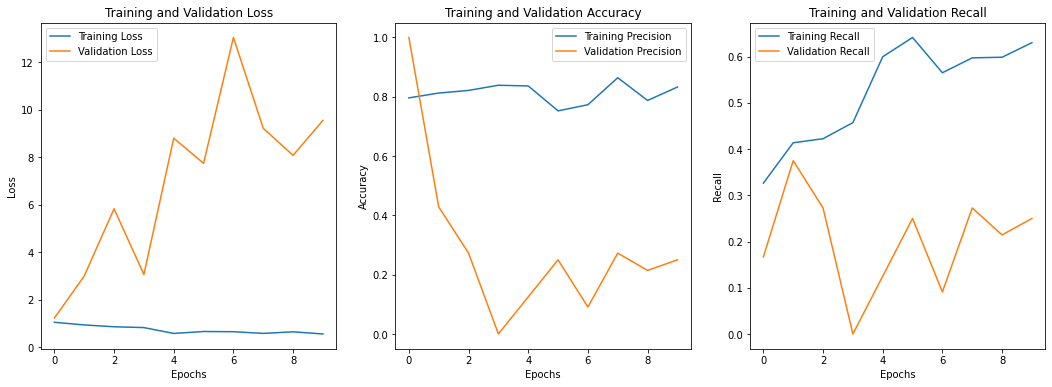

In [62]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.legend()

plt.show()


### 9. Resultados GPU x CPU

Testamos o modelo tanto usando GPU quanto CPU e os resultados estão nas imagens que se encontram nos caminhos abaixo.

GPU

A imagem com os resultados do treinamento usando GPU pode ser encontrada no diretório `src/assets/img/resultados-modelo-pre-treinado-GPU.jpg`

CPU

A imagem com os resultados do treinamento usando CPU pode ser encontrada no diretório `src/assets/img/resultados-modelo-pre-treinado-CPU.jpg`

Chegamos a resultados pouco relevantes para usarmos no nosso modelo próprio mas serviu de aprendizado para futuras melhorias.